Audiosignaali voidaan tuoda helposti Pythoniin .wav-muodossa seuraavasti

```python
from scipy.io import wavfile
samplerate, data = wavfile.read(path)
```

Vastaavasti voidaan signaali tallentaa

```python
scaled = np.int16(data / np.max(np.abs(data)) * 32767)
write(’signal.wav’, samplerate, scaled)
```

Lataa Moodlesta äänitiedosto noisy signal.wav. Poista siitä kohina Fourier-analyysiä käyttäen. Tallenna puhdistettu
tiedosto ja varmista kuuntelemalla, että menetelmä toimii.

Sämpläytaajuus on 48000  Hz
Datassa on  425280  näytettä
Datan pitus on  8.86  s


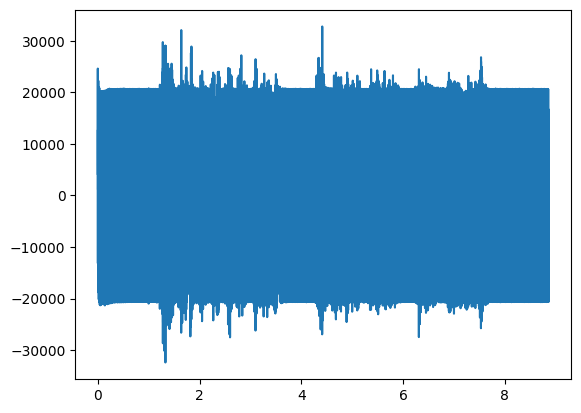

In [9]:
from scipy.io import wavfile 
import numpy as np
import matplotlib.pyplot as plt

#Luetaan äänitiedosto
samplerate, data = wavfile.read('less_noisy_signal.wav')

print('Sämpläytaajuus on', samplerate,' Hz')
print('Datassa on ',len(data),' näytettä')
print('Datan pitus on ',len(data)/samplerate,' s')

#Määritellään aika
dt = 1/samplerate
t = np.arange(0,len(data)/samplerate,dt)
plt.plot(t,data)
plt.show()

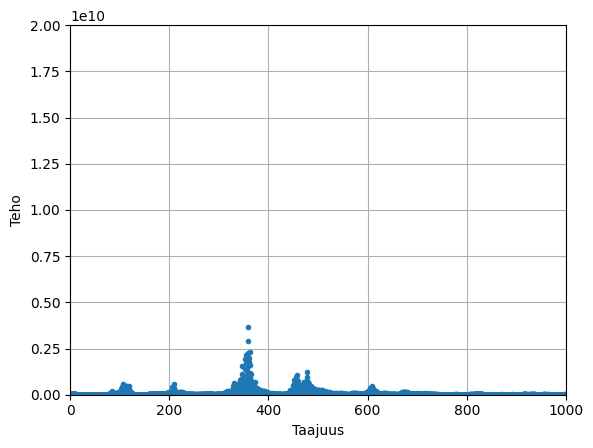

In [10]:
#Lasketaan Fuorier-muunnos ja tehopektri:
f = data
N = len(f) #Havaintojen määrä
fourier = np.fft.fft(f,N) #Fourier-muunnos
psd = fourier*np.conj(fourier)/N #Tehospektri
freq = np.fft.fftfreq(N,dt) #Taajuudet
L = np.arange(1,int(N/2)) #Rajataan pois nollataajuus ja negatiiviset taajuudet

plt.plot(freq[L],psd[L].real,'.')
plt.ylabel('Teho')
plt.xlabel('Taajuus')
plt.grid()
plt.axis([0,1000,0,2e10])
plt.show()

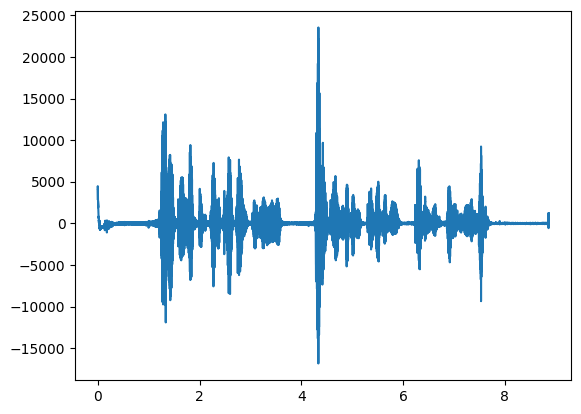

/tmp/ipykernel_704/2105750613.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  scaled = np.int16(signal_clean / np.max(np.abs(signal_clean)) * 32767)


In [11]:
fourier_clean = fourier.copy()
fourier_clean[psd>1e10] = 0 #Poistetaan tehokkaimmat taajuudet
#less_noisyn tapauksessa riittää poistaa tehokkaimmat taajuudet, taajuuskaistaa ei tarvitse poistaa

#Poistetaan valittu taajuuskaista:
fourier_clean[np.logical_and(np.abs(freq) > 250, np.abs(freq) < 450)] = 0
fourier_clean[np.abs(freq) > 10000] = 0

signal_clean = np.fft.ifft(fourier_clean)
plt.plot(t,signal_clean.real)
plt.show()

from scipy.io.wavfile import write
scaled = np.int16(signal_clean / np.max(np.abs(signal_clean)) * 32767) 
#write('cleaned_signal_less_noise.wav', samplerate, scaled) 
write('cleaned_signal.wav', samplerate, scaled) 